# Разложение Шура

Любую квадратную матрицу $A$ можно преобразованием $U$ подобия привести к верхнетреугольной матрице $R$,
причем преобразование $U$ можно выбрать унитарным (ортогональным для вещественных матриц):
$$A=URU^*,\quad U^*AU=R,\quad UU^*=U^*U=1,$$
такое представление матрицы называется [разложением Шура](https://en.wikipedia.org/wiki/Schur_decomposition).
Здесь и далее мы будем обозначать единичную матрицу подходящего размера через $1$,
а сопряженную матрицу к $A$ через $A^*$.
Элементы сопряженной матрицы получаются транспонирование матрицы с последующим комплексным сопряжением:
$$
A^*=\bar A^T,\quad (A^*)_{nk}=\overline{A_{kn}}. 
$$ 
Столбцы матрицы преобразования $U$ называются векторами Шура.

## Задания.

#### 1. Какой смысл имеют диагональные элементы матрицы $R$?

Диагональные элементы матрицы $R$ представляют собой собственные числа матрицы $A$

#### 2. В каком случае вектора Шура оказываются собственными векторами?

Когда $A$ нормальная (коммутирует со своей эрмитово-сопряженной $AA^*=A^*A$)

#### 3. Покажите, что сумма квадратов абсолютных значений всех недиагональных элементов матрицы $R$ не зависит от выбора $U$ и определяется только матрицей $A$:
$$ N = \sum_{n}\sum_{k>n} |R_{nk}|^2.$$
#### Какой смысл вы можете придать этой сумме?

$$R=U^*AU \Rightarrow \sum|r_{ij}|^2=\sum|\overline{u_{ki}}A_{kl}u_{lj}|^2=\sum(\overline{u_{ki}}A_{kl}u_{lj})(u_{ni}\overline{A_{nm}}\overline{u_{mj}})=\sum\overline{u_{ki}}u_{ni}A_{kl}\overline{A_{nm}}u_{lj}\overline{u_{mj}}=\sum\delta_{kn}A_{kl}\overline{A_{nm}}\delta_{lm}$$

$$\sum_{k,l,m,n=1}^N\delta_{kn}A_{kl}\overline{A_{nm}}\delta_{lm}=\sum_{n,m=1}^N|A_{nm}|^2$$

Принимая во внимание, что это — сумма по всем элементам матриц, а диагональные элементы матрицы $R$ представляют из себя собственные числа матрицы $A$ и не могут зависеть от $U$, становится понятно, что и сумма недиагональных элементов определяется взаимоотношением полученного равенства и собственных чисел матрицы $A$, то есть определяется только матрицей $A$

---

Первый вектор Шура всегда является собственным, поэтому мы можем построить наивную процедуру
вычисления разложения Шура, имея способ вычисления собственных чисел и векторов.
Проще всего оказывается вычислить самое большое по модулю собственное значение матрицы (спектральный радиус),
для этого можно воспользоваться [методом степеней](https://en.wikipedia.org/wiki/Power_iteration).
Суть метода заключается в вычислении последовательности:
$$e_{n+1}=\frac{Ae_n}{\|Ae_n\|},$$
которая при определенных условиях сходится к собственному вектору, отвечающему максимальному по модулю собственому значению $A$. 

## Задания.

#### 4. Предложите достаточные условия сходимости степенного метода.

Достаточно, чтобы $\lambda_1$ — первое собственное число в спектре — было доминантным, а также чтобы $e_n$ имел ненулевую проекцию на доминантный собственный вектор, соответствующий $\lambda_1$.

#### 5. Реализуйте степенной метод. Для проверки результата воспользуйтесь функцией [scipy.linalg.norm(A, ord=2)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.norm.html), которая на квадратной матрице $A$ возвращает ее спектральных радиус.

In [2]:
import numpy as np
import scipy as sp

In [3]:
import matplotlib.pyplot as plt
from cycler import cycler
n = 6
colors = plt.cm.jet(np.linspace(0,1,n))
default_cycler = (cycler(color=colors))

plt.rc('lines', linewidth=1, linestyle='--', marker='.')
plt.rc('axes', prop_cycle=default_cycler)

[[7.88860905e-31]
 [1.00000000e+00]]


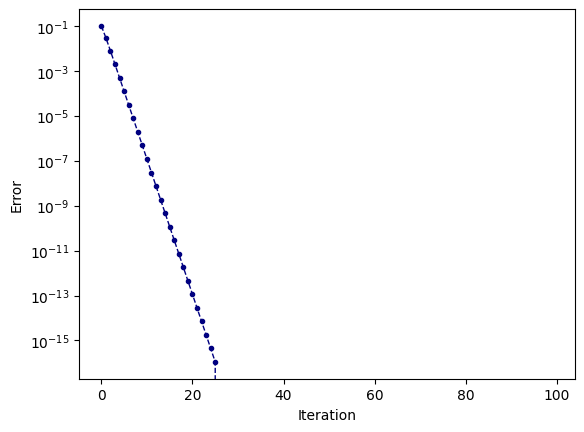

In [4]:
def power_iter(A, x0):
    r = sp.linalg.norm(A, ord=2)
    q = x0
    iters = 100
    errors = np.zeros(iters)
    for i in range(iters):
        z = A@q
        q = z/np.linalg.norm(z)
        l = np.dot(q.conj().T, np.dot(A, q))
        errors[i] = abs(l[0][0]/r-1)
    return q, l, errors
    
A = np.array([[1,0],[0,2]])
x0 = np.array([[1],[1]])

e1, l1, err = power_iter(A, x0)

print(e1)
plt.plot(err)

plt.gca().set_yscale('log')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

[4.56155281 0.43844719 3.        ]
[[ 0.92941026]
 [ 0.26095647]
 [-0.26095647]]


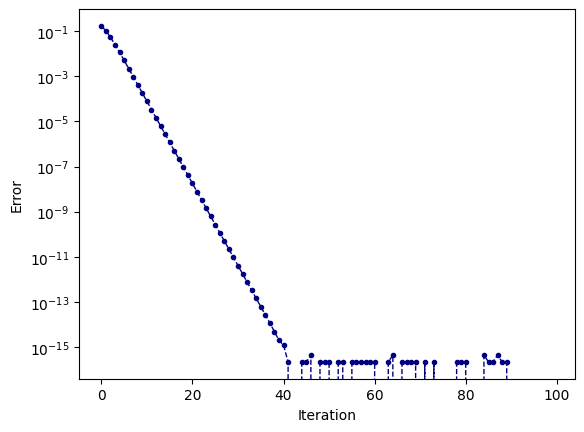

In [24]:
A = np.array([[4, 1, -1], [1, 2, 1], [-1, 1, 2]])
print(np.linalg.eigvals(A))
x0 = np.array([[1],[1],[1]])

e1, l1, err = power_iter(A, x0)

print(e1)
plt.plot(err)

plt.gca().set_yscale('log')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

[0.5+0.8660254j 0.5-0.8660254j 2. +0.j       ]
[[0.57735027]
 [0.57735027]
 [0.57735027]]


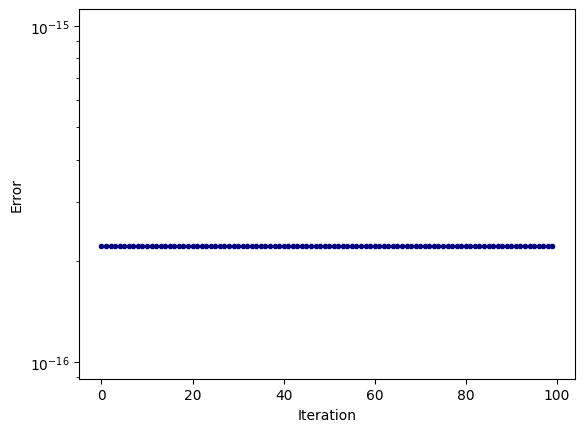

In [5]:
A = np.array([[1, 1, 0], [0, 1, 1], [1, 0, 1]])
print(np.linalg.eigvals(A))
x0 = np.array([[1],[1],[1]])

e1, l1, err = power_iter(A, x0)

print(e1)
plt.plot(err)

plt.gca().set_yscale('log')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

#### 6. Первый вектор Шура находится степенным методом, как можно найти второй вектор Шура? 
__Указание:__ Рассмотрите подматрицу $A_{2\colon,2\colon}$.

Нахождение первого вектора Шура представляет из себя матрицу $U_1$, такую что в разложении Шура $U=\Pi_{i=1}^nU_i$.

Можно выделить $A=U_1R_1U_1^{*}$, где $R_1=\left[ \begin{array}{cc} \lambda _{ 1 } & w \\ 0 & A _{ 2 } \end{array} \right]$.

Таким образом, нахождение $U_i \ (i=2\dots n)$ сводится к применению степенного метода к $A_i \ (i=2\dots n)$: матрица $U$ получится вехнетреугольной и унитарной.

#### 7. Реализуйте функцию для построения разложения Шура с помощью степенного метода. В каких случаях алгоритм сойдется? В каких случаях сойдется к разложению Шура? С какой скоростью итерации сходятся в случае сходимости?

In [6]:
def gram_schmidt(As):
    A = As.copy()
    for i in range(A.shape[0]):
        for j in range(i):
            A[:,i] = A[:,i] - np.dot(A[:,j], A[:,i]) * A[:,j]
        A[:,i] = A[:,i] / np.linalg.norm(A[:, i])
    return A
        
def schur_power(As):
    A = As.copy()
    n = A.shape[0]
    U = np.eye(n)
    x0 = np.array([[1]]*n)
    for i in range(n):
        Ui = np.eye(n)
        e, _, _ = power_iter(A[i:,i:], x0[i:,:])
        Ui[i:,i] = e.conj().T
        Ui = gram_schmidt(Ui)
        A = Ui.conj().T @ A @ Ui
        U = U @ Ui
    return U, U.T @ As @U

In [7]:
A = np.array([[1, 1, 0], [0, 1, 1], [1, 0, 1]])
U, R = schur_power(A)
print(U@R@U.conj().T)
print(f'\n{U=}')
print(f'{R=}\n')
R, U = sp.linalg.schur(A)
print(f'{U=}')
print(f'{R=}')

[[1.00000000e+00 1.00000000e+00 5.75232852e-16]
 [7.94071479e-16 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.76797718e-16 1.00000000e+00]]

U=array([[ 0.57735027,  0.21132487, -0.78867513],
       [ 0.57735027, -0.78867513,  0.21132487],
       [ 0.57735027,  0.57735027,  0.57735027]])
R=array([[ 2.00000000e+00,  1.22305252e-16, -8.51749217e-16],
       [ 1.31018250e-16,  5.00000000e-01, -8.66025404e-01],
       [-8.81372161e-16,  8.66025404e-01,  5.00000000e-01]])

U=array([[ 0.81567014, -0.03672727, -0.57735027],
       [-0.37602832,  0.7247547 , -0.57735027],
       [-0.43964182, -0.68802743, -0.57735027]])
R=array([[ 5.00000000e-01,  8.66025404e-01, -1.88296216e-16],
       [-8.66025404e-01,  5.00000000e-01,  5.75201750e-16],
       [ 0.00000000e+00,  0.00000000e+00,  2.00000000e+00]])


In [8]:
A = np.array([[2, 0], [0, 1]])
U, R = schur_power(A)
print(U@R@U.conj().T)
print(f'\n{U=}')
print(f'{R=}\n')
R, U = sp.linalg.schur(A)
print(f'{U=}')
print(f'{R=}')

[[2. 0.]
 [0. 1.]]

U=array([[ 1.00000000e+00, -7.88860905e-31],
       [ 7.88860905e-31,  1.00000000e+00]])
R=array([[ 2.00000000e+00, -7.88860905e-31],
       [-7.88860905e-31,  1.00000000e+00]])

U=array([[1., 0.],
       [0., 1.]])
R=array([[2., 0.],
       [0., 1.]])


In [9]:
A = np.array([[2, 1j], [-1j, 1]])
U, R = schur_power(A)
print(U@R@U.conj().T)
print(f'\n{U=}')
print(f'{R=}\n')
R, U = sp.linalg.schur(A)
print(f'{U=}')
print(f'{R=}')

C:\Temp\ipykernel_7144\4102204287.py:17: ComplexWarning: Casting complex values to real discards the imaginary part
  Ui[i:,i] = e.conj().T


[[ 2.00000000e+00-2.3830451e-18j -4.76609021e-18+1.0000000e+00j]
 [-2.38304510e-18-1.0000000e+00j  1.00000000e+00+2.3830451e-18j]]

U=array([[ 0.93417236, -0.35682209],
       [ 0.35682209,  0.93417236]])
R=array([[ 1.872678  +2.3830451e-18j, -0.33333333+1.0000000e+00j],
       [-0.33333333-1.0000000e+00j,  1.127322  -2.3830451e-18j]])

U=array([[ 0.85065081+0.j        , -0.52573111+0.j        ],
       [ 0.        -0.52573111j,  0.        -0.85065081j]])
R=array([[2.61803399e+00+0.j, 2.22044605e-16+0.j],
       [0.00000000e+00+0.j, 3.81966011e-01+0.j]])


Видим, что наш метод работает только с вещественнозначными матрицами

При этом метод сходится тогда и только тогда, когда сходится степенной метод, то есть когда собственные значения матрицы различны

In [10]:
def schur_power_err(As):
    A = As.copy()
    n = A.shape[0]
    U = np.eye(n)
    x0 = np.array([[1]]*n)
    for i in range(n):
        Ui = np.eye(n)
        e, _, err = power_iter(A[i:,i:], x0[i:,:])
        plt.semilogy(err)
        plt.show()
        Ui[i:,i] = e.conj().T
        Ui = gram_schmidt(Ui)
        A = Ui.conj().T @ A @ Ui
        U = U @ Ui
    return U, U.T @ As @U

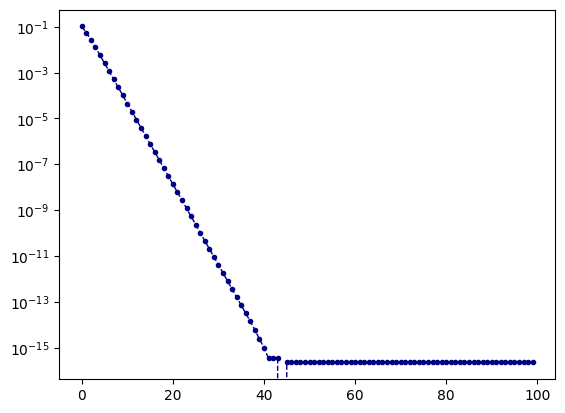

D:\emae\python\matrices\venv_ipy\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


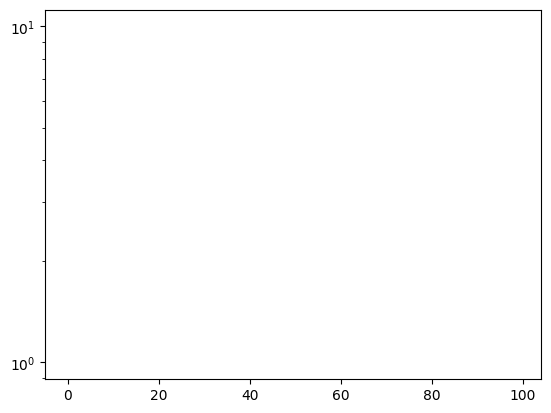

In [11]:
A = np.array([[2, 0], [0, 3]])
U, R = schur_power_err(A)

Для нахождения собственных чисел степенным методом в данном случае достаточно 25 итераций

(на втором графике ничего не видим, потому что ошибка равна 0 - второе собственное число найдено как единственный элемент матрицы $1\times 1$)

#### 8. Обобщите степенной метод так, чтобы одновременно вычислялось несколько собственных векторов. 
Реализуйте эту модификацию. Какие условия являются достаточными для сходимости вашего метода.

Степенной метод также можно применять к двум ортонормированным векторам сразу. Однако, зная $QR$ разложение, можно реализовать степенной метод для всех собственных векторов сразу. Для этого достаточно обеспечить сходимость степенного метода - различные собственные значения.

In [12]:
def power_simultaneous(A):
    iters = 100
    Q, R = np.linalg.qr(np.random.rand(*A.shape))
    for i in range(iters):
        B = A @ Q
        Q, R = np.linalg.qr(B)
    return Q, R

In [13]:
A = np.array([[2, 0], [0, 1]])
_, R = power_simultaneous(A)
print(f'{R=}\n')
R, U = sp.linalg.schur(A)
print(f'{R=}')

R=array([[2.00000000e+00, 7.94840147e-32],
       [0.00000000e+00, 1.00000000e+00]])

R=array([[2., 0.],
       [0., 1.]])


## Задания.

#### 9. Предложите матрицу, у которой левый и правый собственные вектра для одного собственного значения почти ортогональны. Добавляя малое возмущение к матрице (можно воспользоваться [numpy.random.randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)) и находя собственные значения для возмущенной матрицы через `scipy.linalg.schur` оцените число обусловленности для вычисления собственного числа. Сравните с теорией.

В качестве такой матрицы можно выбрать
$$A=\begin{pmatrix}1& 1/\epsilon \\ \epsilon&1\end{pmatrix}$$

In [14]:
epsilon = 0.00001
A = np.array([[1,1/epsilon],[epsilon,1]])
print(np.linalg.eig(A)[1])
print(np.linalg.eig(A.T)[1])

[[ 1.e+00 -1.e+00]
 [ 1.e-05  1.e-05]]
[[ 1.e-05 -1.e-05]
 [ 1.e+00  1.e+00]]


In [15]:
B = A + np.linalg.norm(0.01*np.random.randn(2,2))
print(B)
R = sp.linalg.schur(A)[0]
print(f'Eigenvalue for A: {np.linalg.eig(A)[0][0]}')
print(f'Eigenvalue for A with noise: {np.diag(R)[0]}')
print(f'\n Condition number: ', abs(np.linalg.eig(A)[0][0] - np.diag(R)[0]) / np.diag(R)[0] / np.linalg.norm(B))

[[1.02368011e+00 1.00000024e+05]
 [2.36901143e-02 1.02368011e+00]]
Eigenvalue for A: 2.0
Eigenvalue for A with noise: 2.0

 Condition number:  0.0


Шум не повлиял на собственные значения матрицы

#### 10. Рассмотрите малое возмущение $\epsilon$ для матрицы $$A=\begin{pmatrix}1&a\\\epsilon&1\end{pmatrix},$$ где $a$ - параметр. Насколько сильно возущение изменяет собственные значения? Собственные вектора (`scipy.linalg.eig`)?

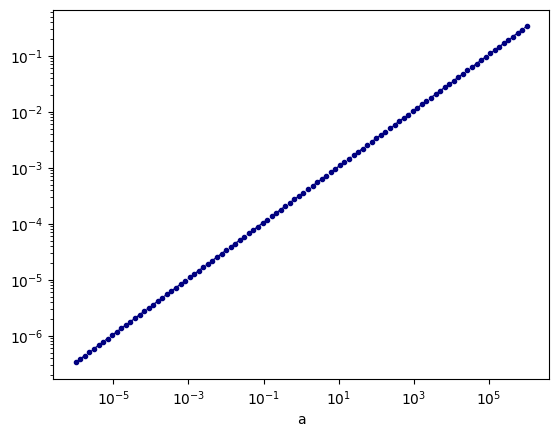

In [16]:
epsilon = 1e-6*np.random.rand()
a = np.logspace(-6, 6, 100)
dlambda = np.empty_like(a)
for i in range(len(a)):
    A = np.array([[1,a[i]],[epsilon, 1]])
    B = np.array([[1,a[i]],[0, 1]])
    dlambda[i] = abs(np.max(np.linalg.eig(A)[0])-np.max(np.linalg.eig(B)[0]))

plt.loglog(a, dlambda)
plt.xlabel('a')
plt.show()

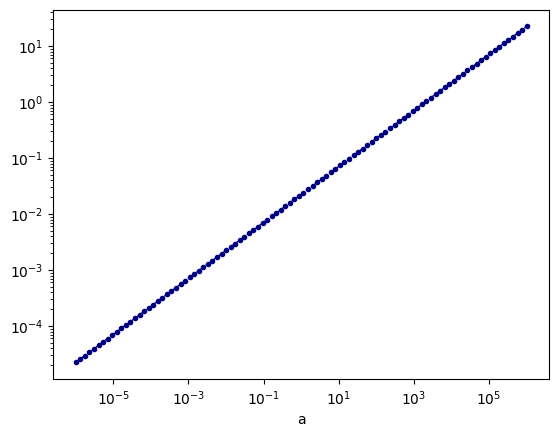

In [17]:
epsilon = 1e-3*np.random.rand()
a = np.logspace(-6, 6, 100)
dlambda = np.empty_like(a)
for i in range(len(a)):
    A = np.array([[1,a[i]],[epsilon, 1]])
    B = np.array([[1,a[i]],[0, 1]])
    dlambda[i] = abs(np.max(np.linalg.eig(A)[0])-np.max(np.linalg.eig(B)[0]))

plt.loglog(a, dlambda)
plt.xlabel('a')
plt.show()

Видим, что в такой матрице изменение собственных значений, связанное с возмущением, монотонно растет с увеличением параметра $a$. При этом увеличение шума не меняет вида зависимости.

---

На практике для вычисления разложения Шура как правило используется [QR алгоритм](https://en.wikipedia.org/wiki/QR_algorithm) и его варианты. 
Мы ограничимся изучением этого метода только для симметричных матриц.

Пусть матрица $A$ имеет только вещественные коэффициенты и симметрична, т.е. $A^T=A$.
В этом случае матрица $R$ в разложение Шура для матрица $A$ оказывается диагональным, т.е. выполняется спектральное разложение.

Перед выполнение QR алгоритма матрица $A$ приводится преобразованием подобия к более простому виду $A_0=VAV^T$,
как правило к виду [матрицы Хессенберга](https://en.wikipedia.org/wiki/Hessenberg_matrix).
Преобразование $V$ можно представить, например, в виде цепочки [вращений Гивенса](https://en.wikipedia.org/wiki/Givens_rotation).
На одном шаге QR алгоритма строится QR разложение матрицы $A_n=Q_nR_n$,
затем матрицы из разложения перемножаются в обратном порядке, формируя новый член последовательности:
$A_{n+1}=R_nQ_n$.
Все матрицы в последовательности подобны: $A_{n+1}=Q_n^TA_nQ_n$.
Итерации повторяются до тех пор, пока матрица $A_n$ не станет достаточно треугольной.

В наивном варианте QR алгоритм не всегда сходится, однако ситуацию можно исправить, добавив в сдвиги.
На каждом шаге алгоритма будем строить QR разложение для $A_n-\zeta_n=Q_nR_n$ с подходящим $\zeta_n$.
Следующий член последовательности определим так $A_{n+1}=R_nQ_n+\zeta_n$.
Последовательность $\zeta_n$ выбирается так, чтобы $\zeta_n$ сходилось к минимальному собственному числу,
например, полагая $\zeta_n$ равным элементу $R$ из последнего столбца и строки.
В этому случае итерации почти всегда сходятся и дают кубическую скорость сходимости.

## Задания.

#### 11. Реализуйте QR алгоритм со сдвигами для симметричной матрицы $A$. 
Экспериментально проверьте скорость сходимости. 
Сравните со скорость сходимости степенного метода.

In [22]:
def qr_shift(As):
    A = As.copy()
    iters = 100
    err = np.zeros(iters)
    n = A.shape[0]
    Q = np.eye(n)
    for i in range(iters):
        Q, R = np.linalg.qr(A)
        A = R @ Q
        err[i] = np.sum(np.abs(A - np.diag(np.diag(A))))
    return np.diag(A), err

[4.56155281 3.         0.43844719]


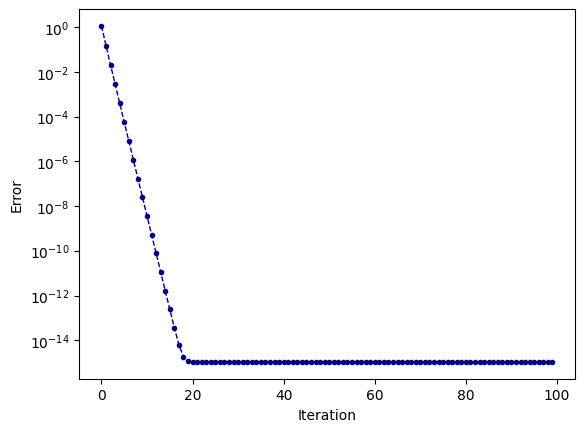

In [23]:
A = np.array([[4, 1, -1], [1, 2, 1], [-1, 1, 2]])

eigenvalues, err = qr_shift(A)

print(eigenvalues)
plt.plot(err)

plt.gca().set_yscale('log')
plt.ylabel('Error')
plt.xlabel('Iteration')
plt.show()

Сходится почти в 2.3 раза быстрее степенного метода (18 итераций против 41)

#### 12. **(повышенная сложность)** Реализуйте неявный QR алгоритм. Сравните его работу с работой явного метода.

#### 13. Предложите и реализуйте метод вычисления [сингулярного (SVD) разложения](https://en.wikipedia.org/wiki/Singular_value_decomposition), используя разложение Шура. Постарайтесь избежать вычисления матриц $AA^T$ и $A^TA$.

$$A=URU^T=U(R^T)^TU^T=U(QD)^TU^T=UDQ^TU^T,$$где $QD$ — результат $QR$-разложения матрицы $R$.

In [39]:
def sv_decomp(As):
    A = As.copy()
    R, U = sp.linalg.schur(A)
    Q, D = np.linalg.qr(R)
    S = D
    VT = Q.T @ U.T
    return U, S, VT

In [40]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
U, S, VT = sv_decomp(A)
print(f'{U@S@VT=}\n')

print("U: ", U)
print("Singular Values: ", np.diag(S))
print("V^T: ", VT)

U, S, VT = np.linalg.svd(A)

print("\nU: ", U)
print("Singular Values: ", S)
print("V^T: ", VT)

U@S@VT=array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

U:  [[-0.23197069 -0.88290596  0.40824829]
 [-0.52532209 -0.23952042 -0.81649658]
 [-0.8186735   0.40386512  0.40824829]]
Singular Values:  [ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
V^T:  [[-0.23197069 -0.52532209 -0.8186735 ]
 [-0.88290596 -0.23952042  0.40386512]
 [ 0.40824829 -0.81649658  0.40824829]]

U:  [[-0.21483724  0.88723069  0.40824829]
 [-0.52058739  0.24964395 -0.81649658]
 [-0.82633754 -0.38794278  0.40824829]]
Singular Values:  [1.68481034e+01 1.06836951e+00 4.41842475e-16]
V^T:  [[-0.47967118 -0.57236779 -0.66506441]
 [-0.77669099 -0.07568647  0.62531805]
 [-0.40824829  0.81649658 -0.40824829]]


Почему-то второй столбец $U$ и второе сингулярное значение отличаются по знаку между моим методом и `numpy.linalg.svd`